In [9]:
#SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [16]:
import pandas as pd
import numpy as np

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

In [18]:
X = iris.data
y = iris.target

In [19]:
print (X.shape)
print(y.shape)

(150, 4)
(150,)


In [22]:
# Now split the data 

from sklearn.model_selection import train_test_split
# test size is 40% of the dataset - 60/40 split is good practice
# how is the data split - completely randomly everytime if random_state is not stated - for consistency specify a number
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 4)

In [23]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(60, 4)
(90, 4)
(60,)
(90,)


In [24]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(X_train,y_train) #fit the training data

C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qraza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = logreg.predict(X_test) #predict the response from the test data and store the results in variable y_pred


In [26]:
from sklearn import metrics 
print(metrics.accuracy_score(y_test, y_pred)) #compare the predicted response with the actual respnse from the test data (93%)

0.9333333333333333


In [27]:
#repeat with knn = 5
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred)) #(97%)


0.9666666666666667


In [28]:
#repeat with knn = 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred)) #(95%)


0.95


In [29]:
#which k number to use? run a for loop for k between 1 to 25

k_range = {}
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    result = metrics.accuracy_score(y_test, y_pred)
    k_range[i] = result
print(k_range)


{1: 0.95, 2: 0.95, 3: 0.9666666666666667, 4: 0.9666666666666667, 5: 0.9666666666666667, 6: 0.9833333333333333, 7: 0.9833333333333333, 8: 0.9833333333333333, 9: 0.9833333333333333, 10: 0.9833333333333333, 11: 0.9833333333333333, 12: 0.9833333333333333, 13: 0.9833333333333333, 14: 0.9833333333333333, 15: 0.9833333333333333, 16: 0.9833333333333333, 17: 0.9833333333333333, 18: 0.9666666666666667, 19: 0.9833333333333333, 20: 0.9666666666666667, 21: 0.9666666666666667, 22: 0.9666666666666667, 23: 0.9666666666666667, 24: 0.95, 25: 0.95}


In [30]:
#the k with the highest accuracy
max(zip(k_range.values(), k_range.keys()))

(0.9833333333333333, 19)

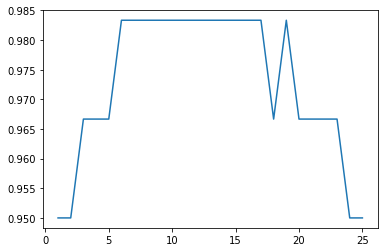

In [31]:
#lets plot the results 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(k_range.keys()), list(k_range.values()))


In [40]:
#maximum accuracy reached from k = 6 up tp 16, and then from 19 to 20  
#however note the training set is very small and classification problem is easy

#Retrain the model on the entire dataset, i.e. not just train / split to make out of sample predictions 

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X, y)
knn.predict(np.array([3,5,4,2]).reshape(1,-1))
   

array([1])

In [41]:
#models that overfit have learned the noise in the data rather than the signal!!!!!!!!!!